In [1]:
import sys
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.preprocessing.preprocessing import load_and_split_data, load_and_split_data_for_vgg16, TARGET_CLASSES
from src.evaluation.evaluate import evaluate_model

In [3]:
_, _, test_ds, _ = load_and_split_data(batch_size=32) # for evaluation we only use test ds

                     precision    recall  f1-score   support

     baby_back_ribs       0.89      0.88      0.89       118
  breakfast_burrito       0.85      0.95      0.90       111
          hamburger       0.95      0.86      0.91       122
           pancakes       0.93      0.92      0.93       103
              pizza       0.95      0.92      0.94       106
            risotto       0.92      0.91      0.92       101
              steak       0.81      0.85      0.83       112
spaghetti_bolognese       0.96      0.95      0.96       108

           accuracy                           0.91       881
          macro avg       0.91      0.91      0.91       881
       weighted avg       0.91      0.91      0.91       881



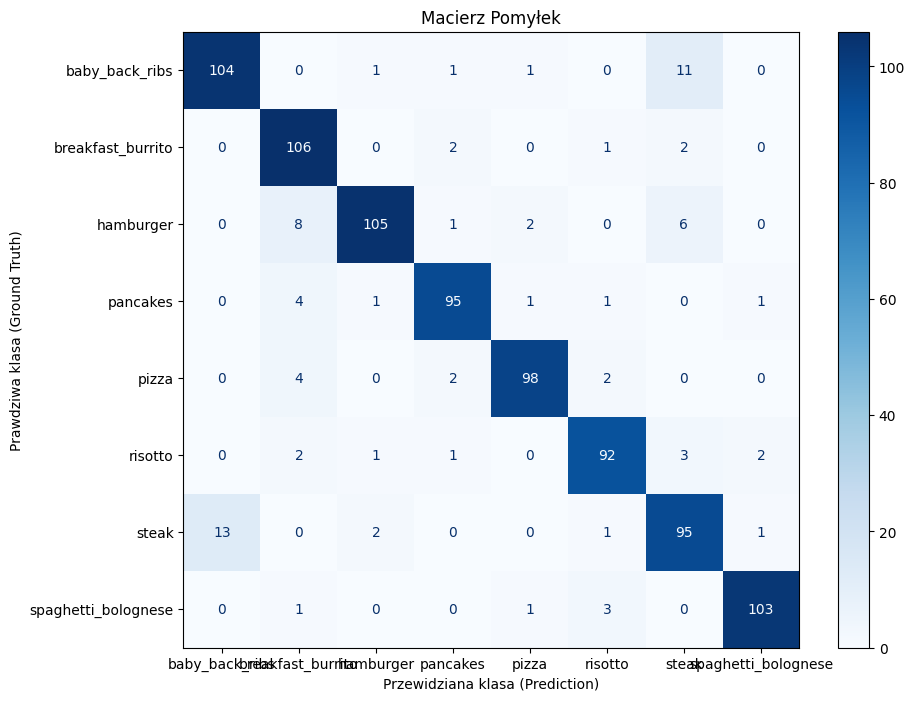

array([[104,   0,   1,   1,   1,   0,  11,   0],
       [  0, 106,   0,   2,   0,   1,   2,   0],
       [  0,   8, 105,   1,   2,   0,   6,   0],
       [  0,   4,   1,  95,   1,   1,   0,   1],
       [  0,   4,   0,   2,  98,   2,   0,   0],
       [  0,   2,   1,   1,   0,  92,   3,   2],
       [ 13,   0,   2,   0,   0,   1,  95,   1],
       [  0,   1,   0,   0,   1,   3,   0, 103]], dtype=int64)

In [4]:
model_path = 'models/final_efficientnet_8class.h5'
model = load_model(model_path)
evaluate_model(model, test_ds, TARGET_CLASSES)

# VGG16

In [3]:
_, _, test_ds, _ = load_and_split_data_for_vgg16(batch_size=32)

                     precision    recall  f1-score   support

     baby_back_ribs       0.84      0.85      0.84       118
  breakfast_burrito       0.84      0.89      0.86       111
          hamburger       0.86      0.89      0.88       122
           pancakes       0.92      0.89      0.91       103
              pizza       0.94      0.92      0.93       106
            risotto       0.88      0.89      0.89       101
              steak       0.79      0.72      0.75       112
spaghetti_bolognese       0.94      0.94      0.94       108

           accuracy                           0.88       881
          macro avg       0.88      0.88      0.88       881
       weighted avg       0.87      0.88      0.87       881



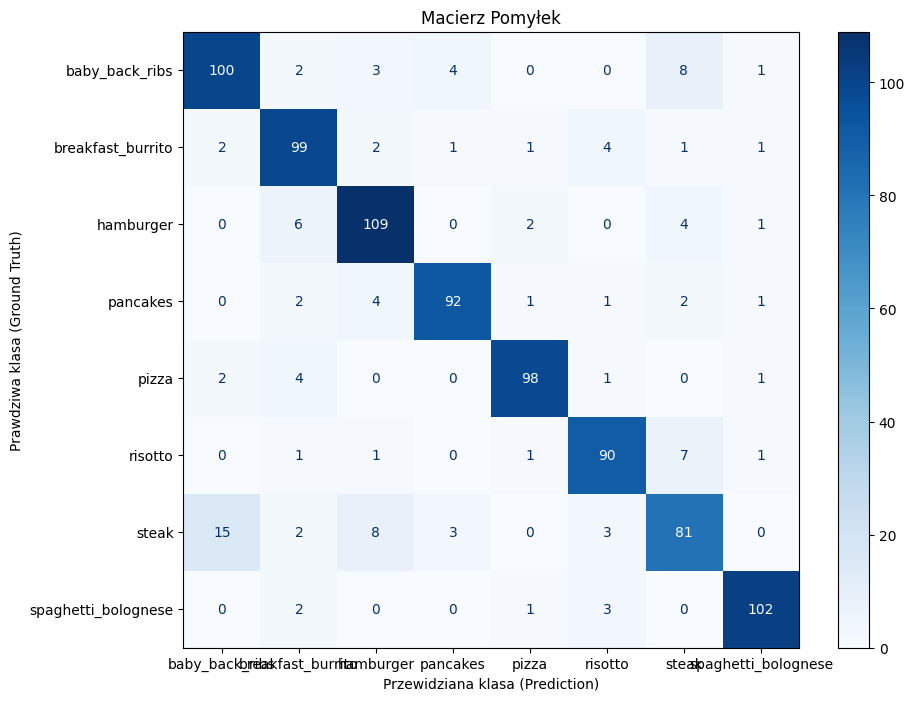

array([[100,   2,   3,   4,   0,   0,   8,   1],
       [  2,  99,   2,   1,   1,   4,   1,   1],
       [  0,   6, 109,   0,   2,   0,   4,   1],
       [  0,   2,   4,  92,   1,   1,   2,   1],
       [  2,   4,   0,   0,  98,   1,   0,   1],
       [  0,   1,   1,   0,   1,  90,   7,   1],
       [ 15,   2,   8,   3,   0,   3,  81,   0],
       [  0,   2,   0,   0,   1,   3,   0, 102]], dtype=int64)

In [4]:
#Model po odmrożeniu warstw
model_path = 'models/final_vgg16_8class_compressed.h5'
model = load_model(model_path)
evaluate_model(model, test_ds, TARGET_CLASSES)